# CT Opioid Rehab Admissions Analysis
### This notebook investigates the trends regarding opioid rehab admissions in CT from 2012-2016. It explores both temporal & geographical trends.
#### By Ben Glicksman

------------

### 1) Questions: 
*  What changes have occured in opioid rehab admission rates in CT from 2012-2016?
*  Which locations/towns/places in CT have higher opioid admissions? Is this related to accidental drug deaths?

------------

### 2) Steps: 
1. Load data
2. Use filters to break down the admissions data by year
3. Graph results to compare trends
4. Use GeoPandas to separate the data by towns
5. Check to see if averages range between different towns/counties
6. (Maybe) See if certain economic/social patterns correlate to admissions trends

------------

### 3) Code:

In [1]:
# STEP 1:

# import programs
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import datetime

import geopandas as gpd
from shapely import wkt

In [2]:
# load data
opi_town_df = pd.read_csv('../data/opi_town_clean.csv')
opi_town_df

,year,town,admis,undup_clients,lat,lng
0,2012,Andover,NaN,NaN,41.728789,-72.370309
1,2012,Ansonia,134.0,85.0,41.341980,-73.078296
2,2012,Ashford,20.0,13.0,41.871915,-72.124128
3,2012,Avon,8.0,6.0,41.809641,-72.830547
4,2012,Barkhamsted,18.0,10.0,41.927066,-72.911918
...,...,...,...,...,...,...
845,2016,Windsor Locks,70.0,46.0,41.924953,-72.627177
846,2016,Wolcott,141.0,87.0,41.601588,-72.986414
847,2016,Woodbridge,15.0,10.0,41.352933,-73.014356
848,2016,Woodbury,32.0,21.0,41.545058,-73.208654


In [3]:
opi_town_df

,year,town,admis,undup_clients,lat,lng
0,2012,Andover,NaN,NaN,41.728789,-72.370309
1,2012,Ansonia,134.0,85.0,41.341980,-73.078296
2,2012,Ashford,20.0,13.0,41.871915,-72.124128
3,2012,Avon,8.0,6.0,41.809641,-72.830547
4,2012,Barkhamsted,18.0,10.0,41.927066,-72.911918
...,...,...,...,...,...,...
845,2016,Windsor Locks,70.0,46.0,41.924953,-72.627177
846,2016,Wolcott,141.0,87.0,41.601588,-72.986414
847,2016,Woodbridge,15.0,10.0,41.352933,-73.014356
848,2016,Woodbury,32.0,21.0,41.545058,-73.208654


In [4]:
# STEP 2:

# analyze yearly values
opi_town_year_df = opi_town_df.groupby('year')['admis'].sum().sort_values()

title1='Sum of opioid related admissions by year'
print(title1)
print('-'*len(title1))
print(opi_town_year_df)
print()

Sum of opioid related admissions by year
----------------------------------------
year
2012    21127.0
2013    22875.0
2014    24332.0
2015    27535.0
2016    27773.0
Name: admis, dtype: float64



In [5]:
opi_town_year_undup_df = opi_town_df.groupby('year')['undup_clients'].sum().round().sort_values()

title1='Sum of unique opioid related admissions by year'
print(title1)
print('-'*len(title1))
print(opi_town_year_undup_df)
print()

Sum of unique opioid related admissions by year
-----------------------------------------------
year
2012    13027.0
2013    14422.0
2014    15189.0
2016    16312.0
2015    16713.0
Name: undup_clients, dtype: float64



In [6]:
# load yearly data into new df
cols1 = ['year', 'admis', 'undup_clients']
opi_years = opi_town_df[cols1].groupby('year').sum().round()
opi_years

,admis,undup_clients
year,,
2012,21127.0,13027.0
2013,22875.0,14422.0
2014,24332.0,15189.0
2015,27535.0,16713.0
2016,27773.0,16312.0


In [7]:
opi_years

,admis,undup_clients
year,,
2012,21127.0,13027.0
2013,22875.0,14422.0
2014,24332.0,15189.0
2015,27535.0,16713.0
2016,27773.0,16312.0


Text(0, 0.5, 'number of admissions')

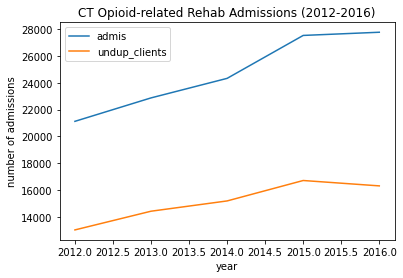

In [21]:
# STEP 3:

# graph results to view trends
opi_years.plot()

plt.title("CT Opioid-related Rehab Admissions (2012-2016)")
plt.ylabel("number of admissions")

(169, 5)

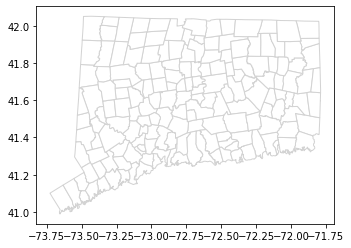

In [9]:
# STEP 4:

# load data set w/ town shapes, as opposed to points
# and plot outlines
town_map_gdf = gpd.read_file('../data/ct_towns_map.geojson')
town_map_gdf.plot(color='white', edgecolor='lightgray')

town_map_gdf.shape

In [10]:

# load geojson version of opi data
opi_towns_gdf = gpd.read_file('../data/opi_admission_by_town.geojson')
opi_towns_gdf.shape

(850, 8)

In [11]:
# 850 rows so across the 5 years of data there is
# a row for each town

In [12]:
# join the town outline gdf with the opi data
opi_towns_by_year_gdf = gpd.sjoin(town_map_gdf,
                                  opi_towns_gdf,
                                  op='contains').set_index('year')

In [13]:
opi_towns_by_year_gdf

,shape_area,shape_len,town_left,town_no,geometry,index_right,town_right,admis,undup_clients,town_geo,lat,lng
year,,,,,,,,,,,,
2016,438072078.45,86301.9757031,Andover,1,"MULTIPOLYGON (((-72.32832 41.73850, -72.32908 ...",16,Andover,22.0,9.0,"Andover, CT\n(41.728789, -72.370309)",41.728789,-72.370309
2012,438072078.45,86301.9757031,Andover,1,"MULTIPOLYGON (((-72.32832 41.73850, -72.32908 ...",823,Andover,NaN,NaN,"Andover, CT\n(41.728789, -72.370309)",41.728789,-72.370309
2014,438072078.45,86301.9757031,Andover,1,"MULTIPOLYGON (((-72.32832 41.73850, -72.32908 ...",124,Andover,9.0,7.0,"Andover, CT\n(41.728789, -72.370309)",41.728789,-72.370309
2015,438072078.45,86301.9757031,Andover,1,"MULTIPOLYGON (((-72.32832 41.73850, -72.32908 ...",71,Andover,17.0,10.0,"Andover, CT\n(41.728789, -72.370309)",41.728789,-72.370309
2013,438072078.45,86301.9757031,Andover,1,"MULTIPOLYGON (((-72.32832 41.73850, -72.32908 ...",837,Andover,NaN,NaN,"Andover, CT\n(41.728789, -72.370309)",41.728789,-72.370309
...,...,...,...,...,...,...,...,...,...,...,...,...
2015,1719966271.12,166595.548744,Woodstock,169,"MULTIPOLYGON (((-71.96318 42.02619, -71.95353 ...",384,Woodstock,19.0,11.0,"Woodstock, CT\n(41.950652, -71.977285)",41.950652,-71.977285
2013,1719966271.12,166595.548744,Woodstock,169,"MULTIPOLYGON (((-71.96318 42.02619, -71.95353 ...",512,Woodstock,16.0,14.0,"Woodstock, CT\n(41.950652, -71.977285)",41.950652,-71.977285
2014,1719966271.12,166595.548744,Woodstock,169,"MULTIPOLYGON (((-71.96318 42.02619, -71.95353 ...",748,Woodstock,18.0,12.0,"Woodstock, CT\n(41.950652, -71.977285)",41.950652,-71.977285


* To see if there are differences in a year by year town by town basis we can make 5 plots showing the number of admissions by town in each year

In [14]:
years_to_plot = opi_towns_by_year_gdf.index.sort_values().unique()
len(years_to_plot)

5

In [15]:
years_to_plot2 = 2012,2016

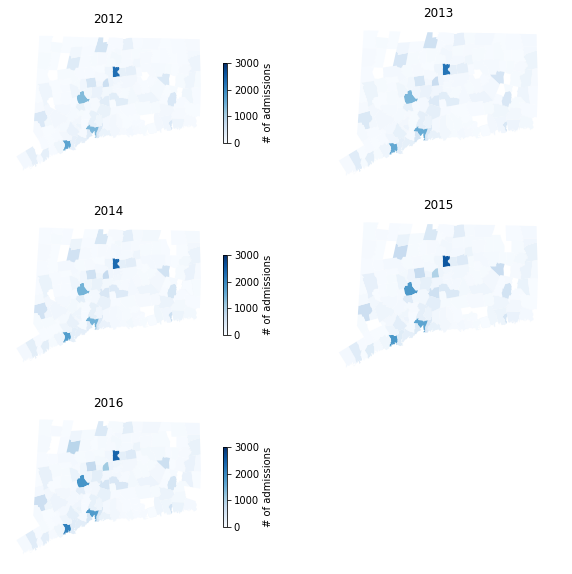

In [24]:
fig, ax = plt.subplots(3,2, figsize=(10,10))
for idx, year in enumerate(years_to_plot):
    col = idx % 2
    row = idx // 2
    current_ax = ax[row][col]
    opi_towns_by_year_gdf.loc[year].plot(column='admis',
                                         ax=current_ax,
                                         cmap='Blues',
                                         legend=col==0,
                                         vmin=0, vmax=3000,
                                         legend_kwds={'shrink': 0.5,
                                                      'label': '# of admissions'}
                                        )
    current_ax.set_title(year)
    current_ax.axis('off')
    
ax[2][1].axis('off')
plt.show()

* For a quick glance it doesn't look like there are any any marked differences in which towns have high admissions from one year to the next - so could probably sum across the five years

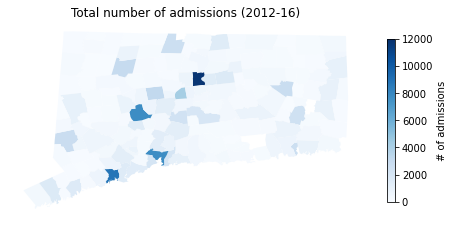

In [17]:
opi_towns_total_gdf=opi_towns_by_year_gdf.groupby('town_left').agg({'geometry': 'first',
                                                'admis': 'sum'})

opi_towns_total_gdf.plot(column='admis',
                         cmap='Blues',
                         legend=col==0,
                         vmin=0, vmax=12000,
                         legend_kwds={'shrink': 0.5,
                                      'label': '# of admissions'},
                         figsize=(8,6)
                        )

plt.axis('off')
plt.title('Total number of admissions (2012-16)')
plt.show()


------------

### 4) Answer:

1. Rates increased
2. Certain regions have higher admissions rates, and they don't vary across the timeframe of the data

------------

### 5) Interpretation/Observation:

1. It appears that opioid rehab admissions rates increased from 2012-2016. That being said, the number of clients admitted had a slight decrease from 2015 to 2016. This is notable.
2. Due to difficulties with GeoPandas data, it is too hard to currently make inferences about the geographical data.